# TAREA FINAL: IMPORTACIÓN DE DATASET (.CSV), SIMULACIÓN DE LOGS Y GRÁFICO DE DATOS

Para este ejercicio propuesto lo primero que haremos es importar las librerías necesarias para trabajar con pandas, numpy, generación de gráficos con matplotlib y seaborn para generar distintos tipos de gráficos estadísticos para el mejor análisis de resultados.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Se procederá a leer el dataset que hemos escogido para trabajar: **"Phishing_Email_1500m.csv"**

***Nota importante:*** El dataset original **"Phishing_Email.csv"** no pudo ser cargado a github por superar el tamaño permitido (25MB) ya que el peso es de 49,6 MB. [GitHub muestra el siguiente mensaje: Yowza, that’s a big file. Try again with a file smaller than 25MB.]

Por esta razón, se ha tomado solo las primeras 1500 muestras para reducir el tamaño del .csv a 2,35 MB **"Phishing_Email_1500m.csv"**

In [5]:
df = pd.read_csv("/workspaces/practica_tres_gr_9/Phishing_Email_1500m.csv", encoding="latin1", sep=";")
df.head()

,Column1,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [6]:
print("Dimension of the DataFrame:",df.shape)

Dimension of the DataFrame: (1501, 3)


## Preprocesamiento del DataFrame

Ejecutaremos el siguiente código para conocer cúantos elementos vacíos hay en cada columna.

In [7]:
df.isnull().sum()

Column1       0
Email Text    2
Email Type    0
dtype: int64

Como se observa en el resultado, en el archivo .csv hay una columna que no tiene nombre y se le ha asignado por defecto "Column1" al cargar/leer la data. Esta columna contiene índices que no son útiles para nuestro análisis, por lo cual esta columna será eliminada. 

Además, existen 2 filas que tienen elementos vacíos o nulos (null values) en la columna "Email Text", lo siguiente que haremos en removerlos o eliminarlos.

In [8]:
#Eliminación de la columna denominada "Column1"
#axis=1 indica que la operación se realizará a lo largo de las columnas del DataFrame

df.drop(["Column1"],axis=1,inplace=True)
print("Dimension of the row data:",df.shape)

Dimension of the row data: (1501, 2)


In [9]:
#Eliminación de filas que tienen elementos vacíos o nulos (null values)
#axis=0 se usa para operaciones a lo largo de las filas del DataFrame
df.dropna(inplace=True,axis=0)
df.drop_duplicates(inplace=True)
print("Dimension of the row data:",df.shape)

Dimension of the row data: (1448, 2)


Como parte del proceso general de limpieza de datos hemos: 

* **Eliminado muestras duplicadas o irrelevantes** y 

* **Tratado las muestras incompletas.**

In [10]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


Para asegurar que los valores en la columna Email Type siempre sean consistentes y se cuenten correctamente (sin importar como están escritos), es necesario normalizar esos valores convirtiendo todos los valores a minúsculas (o mayúsculas) para evitar diferencias de capitalización. En nuestro caso los convertiremos a minúsculas (**Lowercasing**).

In [11]:
#Comprobar si todos los valores de la columna 'Email Type' están en minúsculas
all_lowercase = df['Email Type'].apply(lambda x: x.islower()).all()
# Mostrar el resultado
print(all_lowercase)
print(df['Email Type'])
print(f"{'=' * 50}")

# Convertir todos los valores a minúsculas
df['Email Type'] = df['Email Type'].str.lower()  
# Mostrar el resultado
print(df['Email Type'])

False
0           Safe Email
1           Safe Email
2           Safe Email
3       Phishing Email
4       Phishing Email
             ...      
1496        Safe Email
1497    Phishing Email
1498        Safe Email
1499    Phishing Email
1500        Safe Email
Name: Email Type, Length: 1448, dtype: object
0           safe email
1           safe email
2           safe email
3       phishing email
4       phishing email
             ...      
1496        safe email
1497    phishing email
1498        safe email
1499    phishing email
1500        safe email
Name: Email Type, Length: 1448, dtype: object


* **Eliminar espacios innecesarios.**

A veces, los datos tienen espacios extra alrededor del texto. Eliminaremos los espacios antes y después de las cadenas en la columna "Email Type" para evitar que se cuenten como distintos:

In [12]:
# Eliminar espacios en blanco
df['Email Type'] = df['Email Type'].str.strip()  
print(df['Email Type'])

0           safe email
1           safe email
2           safe email
3       phishing email
4       phishing email
             ...      
1496        safe email
1497    phishing email
1498        safe email
1499    phishing email
1500        safe email
Name: Email Type, Length: 1448, dtype: object


Después de hacer las correcciones, ya tenemos los datos limpios y procedemos a verificar si ahora todas las filas tienen las dos únicas categorías correctas:

In [13]:
# Verificar los valores únicos en la columna
print(df['Email Type'].unique())  

['safe email' 'phishing email']


Finalmente, podemos contar la frecuencia de los valores únicos en la columna Email Type:

In [14]:
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)

Email Type
safe email        869
phishing email    579
Name: count, dtype: int64


Si sumamos la fecuencia de "safe email" y la de "phishing email" es igual al Length del DataFrame: 1448

## Modificación del DataFrame para generar distintas gráficas.

Como nuestro dataFrame únicamente tiene 2 columnas de información, procederemos a crear adicionales con datos simulados, basándonos en el código visto en clase.

* Timestamp (fecha y horas aleatorias).

* IP_origen (direcciones IP aleatorias).

* Email_domain (dominios de correo).

* Priority_level (nivel de prioridad).

* Country (país de origen).

**1. Timestamp**

Como no tenemos una columna de tiempo real, generaremos una columna con fechas y horas aleatorias.

In [15]:
# Importamos librería requerida
from datetime import datetime, timedelta

# Generar una fecha aleatoria dentro de un rango
def generate_random_timestamp(start, end):
    return start + timedelta(seconds=np.random.randint(0, int((end - start).total_seconds())))

# Definir el rango de fechas
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)

# Aplicar la función a cada fila del DataFrame
df['Timestamp'] = [generate_random_timestamp(start_date, end_date) for _ in range(len(df))]
print(df['Timestamp'])

0      2023-09-29 11:27:33
1      2023-10-04 17:40:20
2      2023-06-03 06:37:59
3      2023-04-12 07:48:28
4      2023-07-07 02:12:06
               ...        
1496   2023-01-07 18:40:08
1497   2023-10-02 14:09:28
1498   2023-08-25 11:11:17
1499   2023-10-02 11:10:14
1500   2023-06-14 08:47:06
Name: Timestamp, Length: 1448, dtype: datetime64[ns]


**2. IP_origen**

Generaremos direcciones IP aleatorias dentro de un rango específico. 


In [16]:
# Generar IPs aleatorias dentro de un rango
def random_ip():
    return f"{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}.{np.random.randint(1, 256)}"

# Aplicar la función a cada fila del DataFrame
df['IP_origen'] = [random_ip() for _ in range(len(df))]
print(df['IP_origen'])

0        234.75.205.126
1        66.103.162.152
2        24.189.181.118
3        140.137.27.122
4       214.222.117.177
             ...       
1496     197.205.48.123
1497      244.59.162.47
1498    129.209.160.132
1499      72.202.106.49
1500      148.17.238.87
Name: IP_origen, Length: 1448, dtype: object


**3. Email_domain**

Simularemos algunos dominios de las direcciones de correo y los agregaremos como una nueva columna. 

In [17]:
# Simular un dominio de correo electrónico aleatorio
dominios = ['gmail.com', 'yahoo.com', 'outlook.com', 'hotmail.com','microsoft.com', '@secureemail.com', '@google.com']

def random_email_domain():
    return np.random.choice(dominios)

df['Email_domain'] = [random_email_domain() for _ in range(len(df))]
print(df['Email_domain'])

0              yahoo.com
1       @secureemail.com
2              gmail.com
3            hotmail.com
4          microsoft.com
              ...       
1496         outlook.com
1497           yahoo.com
1498           yahoo.com
1499       microsoft.com
1500         outlook.com
Name: Email_domain, Length: 1448, dtype: object


**4. Priority_level**

Agregaremos una columna que simule el nivel de prioridad de un correo, basándonos en si es phishing email o safe email, ya que este dato viene en el dataset en la columna "Email Type".

In [18]:
# Definir posibles niveles de prioridad para los correos seguros
safe_priority_options = ['Low', 'Medium']

# Asignar 'High' si se trata de phishing, o asignar un valor aleatorio entre 'Low' y 'Medium' si es un email seguro
df['Priority_level'] = df['Email Type'].apply(lambda x: 'High' if x == 'phishing email' else np.random.choice(safe_priority_options))
print(df['Priority_level']) 

0        Low
1        Low
2        Low
3       High
4       High
        ... 
1496     Low
1497    High
1498     Low
1499    High
1500     Low
Name: Priority_level, Length: 1448, dtype: object


**5. Country**

Simularemos la ubicación de origen de los correos mediante países.

In [19]:
# Definir países de origen para los correos
countries = ['USA', 'Canada', 'UK', 'Germany', 'India', 'Colombia', 'Brazil', 'Argentina', 'Spain']

def random_country():
    return np.random.choice(countries)

df['Country'] = [random_country() for _ in range(len(df))]
print(df['Country']) 

0       Argentina
1          Canada
2           India
3        Colombia
4         Germany
          ...    
1496     Colombia
1497     Colombia
1498    Argentina
1499        India
1500       Brazil
Name: Country, Length: 1448, dtype: object


In [20]:
df.head()

,Email Text,Email Type,Timestamp,IP_origen,Email_domain,Priority_level,Country
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",safe email,2023-09-29 11:27:33,234.75.205.126,yahoo.com,Low,Argentina
1,the other side of * galicismos * * galicismo *...,safe email,2023-10-04 17:40:20,66.103.162.152,@secureemail.com,Low,Canada
2,re : equistar deal tickets are you still avail...,safe email,2023-06-03 06:37:59,24.189.181.118,gmail.com,Low,India
3,\nHello I am your hot lil horny toy.\n I am...,phishing email,2023-04-12 07:48:28,140.137.27.122,hotmail.com,High,Colombia
4,software at incredibly low prices ( 86 % lower...,phishing email,2023-07-07 02:12:06,214.222.117.177,microsoft.com,High,Germany


***¡Listo!*** Ya tenemos nuestro DataFrame enriquecido con columnas de datos simulados. 

## Gráficas de Datos

A continuación, graficaremos 6 diferentes ilustraciones.

### 1. Distribución Categórica de Email por tipo

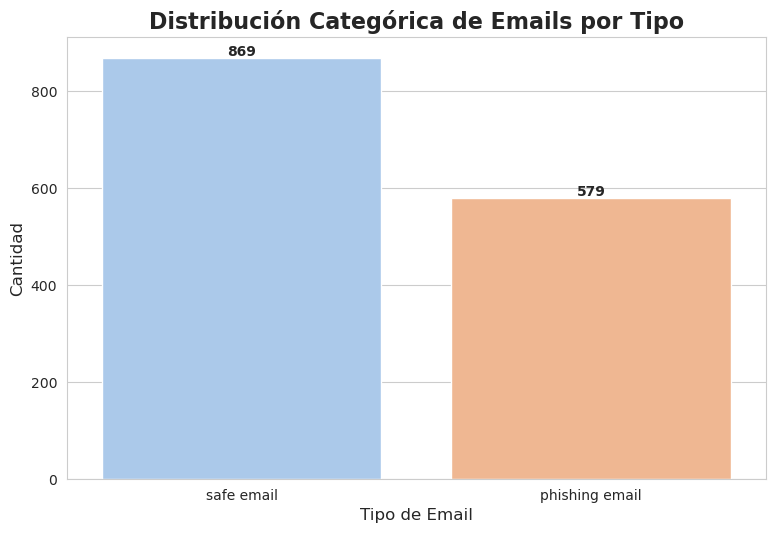

In [21]:
# Configuración del estilo del gráfico Email por tipo

# Definir tamaño
plt.figure(figsize=(15, 10))  

# Fondo con cuadrícula sutil
sns.set_style("whitegrid")  

# Posicionamiento en la cuadrícula
plt.subplot(2, 2, 1)  
email_type_count = df['Email Type'].value_counts()

# Gráfico de barras con 2 colores
palette = sns.color_palette("pastel")[:len(email_type_count)]  
sns.barplot(x=email_type_count.index, y=email_type_count.values, hue=email_type_count.index, palette=palette, legend=False)

# Rotación y alineación de etiquetas del eje X
plt.xticks(rotation=0, ha='center')

# Etiquetas y título con estilo
plt.xlabel('Tipo de Email', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.title('Distribución Categórica de Emails por Tipo', fontsize=16, fontweight='bold')

# Añadir valores sobre las barras
for i, v in enumerate(email_type_count.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10, fontweight='bold')

# Ajustar automáticamente los elementos del gráfico para evitar superposición
plt.tight_layout()

# Guardar figura
plt.savefig('distrib_email_by_type.png')  
# Mostrar figura
plt.show()

### 2. Gráfico pastel por nivel de riesgo de Seguridad

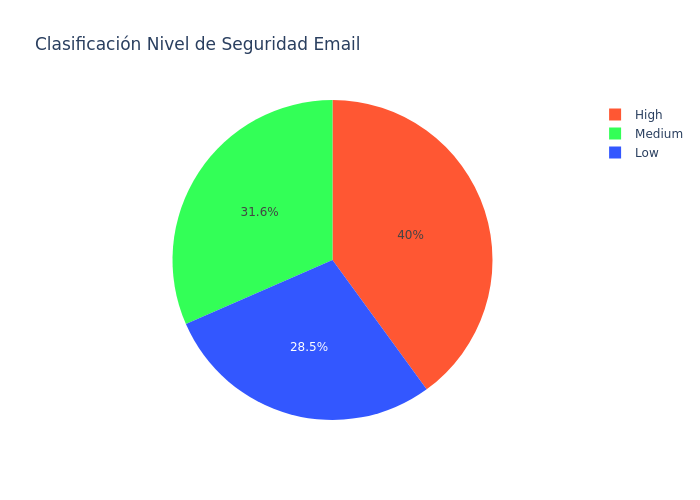

In [37]:
#Se genera una gráfica Tipo Pie para chequear el porcentaje de Nivel de Seguridad que existe en los Email Generados
fig_pie = px.pie(df, 
                 names='Priority_level',
                 title="Clasificación Nivel de Seguridad Email",
                 color_discrete_sequence=["#FF5733", "#33FF57", "#3357FF", "#F4C724", "#A833FF"])
counts = df['Priority_level'].value_counts()
plt.figure(figsize=(6,6))  # Ajustar tamaño
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', 
        colors=["#FF5733", "#33FF57", "#3357FF", "#F4C724", "#A833FF"])
plt.title("Clasificación Nivel de Seguridad Email")
#plt.savefig('priority_level_pie_chart.png', dpi=300, bbox_inches='tight')
plt.close()  # Cierra la figura correctamente
#Guardo la imagen para que se visualice en .ipynb
fig_pie.write_image("priority_level_pie_chart_plotly.png")


Image(filename="priority_level_pie_chart_plotly.png")


### 3. Actividad por hora del día

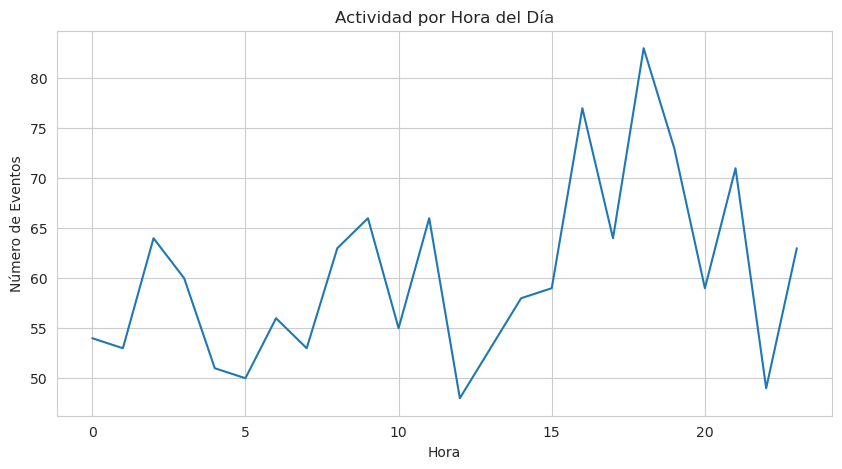

In [39]:
# Asegurar que 'Timestamp' es tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Agrupar por hora sin modificar el DataFrame
hourly_count = df.groupby(df['Timestamp'].dt.hour).size()

# Graficar
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_count.index, y=hourly_count.values)

# Etiquetas y título
plt.title('Actividad por Hora del Día')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')

# Guardar figura
plt.savefig('ActividadporHoraDia.png') 

# Mostrar gráfico
plt.show()

### 4. Eventos por día y por severidad

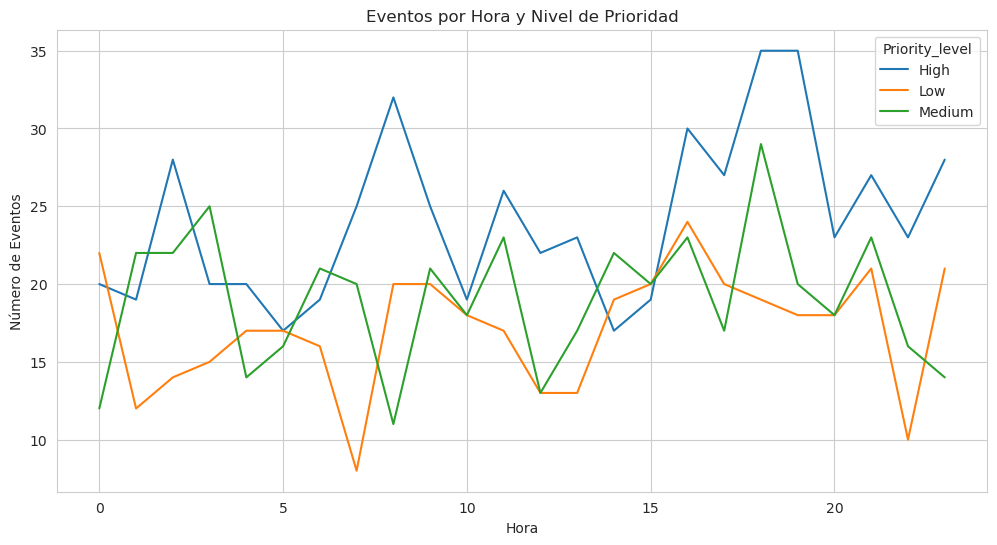

In [38]:
# Asegurar que 'Timestamp' es tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extraer la hora del Timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Agrupar por hora y prioridad (Priority_level)
hourly_priority_count = df.groupby(['Hour', 'Priority_level']).size().reset_index(name='Event_Count')

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Event_Count', hue='Priority_level', data=hourly_priority_count)

# Etiquetas y título
plt.title('Eventos por Hora y Nivel de Prioridad')
plt.xlabel('Hora')
plt.ylabel('Número de Eventos')

# Guardar figura
plt.savefig('Evento_Severidad_Dia.png')  

# Mostrar gráfico
plt.show()

### 5. Mapa de calor de actividad por hora y tipo de evento

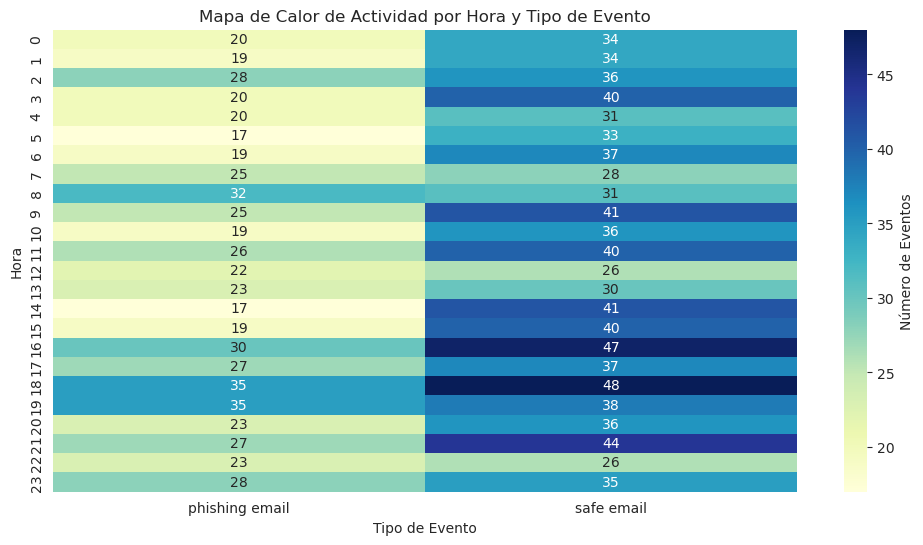

In [40]:
# Asegurar que 'Timestamp' es tipo datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Extraer la hora del Timestamp
df['Hour'] = df['Timestamp'].dt.hour

# Agrupar por hora y tipo de evento (Email Type)
heatmap_data = df.groupby(['Hour', 'Email Type']).size().unstack(fill_value=0)

# Graficar mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Número de Eventos'})

# Etiquetas y título
plt.title('Mapa de Calor de Actividad por Hora y Tipo de Evento')
plt.xlabel('Tipo de Evento')
plt.ylabel('Hora')

# Guardar figura
plt.savefig('MapaDeCalor.png') 


# Mostrar gráfico
plt.show()

### 6. Análisis de accesos fallidos por usuario

In [ ]:
plt.figure(figsize=(10, 6))
failed_logins = logs_df[(logs_df['evento'] == 'login_failure') & (logs_df['exitoso'] == False)]
user_failures = failed_logins['usuario'].value_counts()
sns.barplot(x=user_failures.index.fillna('anónimo'), y=user_failures.values)
plt.title('Intentos de Login Fallidos por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Número de Intentos Fallidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('failed_logins_by_user.png')

### 7. Línea de tiempo de eventos críticos

In [ ]:
plt.figure(figsize=(12, 4))
critical_events = logs_df[logs_df['severidad'] == 'critical']
plt.scatter(critical_events['timestamp'], [1]*len(critical_events), c='red', s=100)
plt.yticks([])
plt.title('Línea de Tiempo de Eventos Críticos')
plt.xlabel('Fecha y Hora')
plt.tight_layout()
plt.savefig('critical_events_timeline.png')

print("Visualizaciones generadas correctamente. Revisa los archivos .png generados.")